<center><h1 style='color: ##154360; font-size: 40px'>Data Mining</h1></center>
<center><h2 style='color: #FFC300'>Group Project</h2></center>
<center><h3 style='color: #FF5733'>Group AA </h3></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Abdallah Zaher, M20190684</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Cristina Mousinho, M20190303</h5></center>
<center><h5 style='font-weight:normal; font-style: normal;'>Gabriel Ravi, M20190925</h5></center>

<b style='color: ##154360;font-size:19px'>Table of contents</b>
<ul>
    <li><a href="#3">3. Data Analysis </a></li>
    <li><a href="#4">4. Multivariate Analysis </a></li>
    <li><a href="#5">5. Clustering </a></li>
    <li><a href="#6">6. Cluster analysis </a></li>
    <li><a href="#7">7. Cluster for Marketing Approach: Description </a></li>
    <li><a href="#8">8. Outliers Analysis </a></li>
</ul>


<hr>
<b style='color: ##154360;font-size:19px' id="intro"> Introduction</b>

As part of the 2019 Data Mining course for the Master in Data Sience and Advanced Analytics, we were challenged to see ourselves as part of a fictional insurance company located in Portugal. 
We were given a data set to work with, from each we are expected to find different costumers' profiles, to group them and to recommend marketing approachs based on those clusters.

By the end of this report, we should not only have an understanding of how our costumers' behave and how we can group them, but also a way to explain our findings and what could be done with them to the Marketing Department of our company. 

We will begin by understading the business we were asked to imagine ourselves in. After we feel confortable with our knowledge on the subject, we will move on to getting to know the provided data. An analysis of each factor will be conducted. In this first stage, we will most likely face problems with our data. If so, the next step will be to take a closer look at those problems and find solutions for each of them. 

<hr>
<b style='color: ##154360;font-size:19px' id="understanding">Business Understanding </b>

<b style="color:#FF5733">Setting bussiness goals</b>

As stated already, the aim is to deliver insights to the Marketing Departament of the ensurance company. <br>
We know the end goal for a company is always to generate more profit. <br>
So even though our job is to group costumers into clusters, it is very important to keep in mind which clients bring us more profits (higher customer monetary value), and smaller losses (lower claim rates). <br>
Eventually we will want to target new costumers, but the ones we already have may also become interested in new premiums, so we definetly can't forget them!

<b style="color:#FF5733">Setting data mining goals</b>

<p style='color:red; font-size:20px'>" define the criteria for a successful outcome to the project in technical terms—for example, a certain level of predictive accuracy or a propensity-to-purchase profile with a given degree of “lift.” As with business success criteria, it may be necessary to describe these in subjective terms, in which case the person or persons making the subjective judgment should be identified. "</p>

<hr>
<b style='color: ##154360;font-size:19px' id="understanding">Data Understanding </b>

<b style="color:#FF5733">Getting to know the data</b>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from sklearn import linear_model
from copy import deepcopy

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



In [2]:
insurance_df = pd.read_csv('A2Z_Insurance.csv', index_col = ['Customer Identity']) # Loading the provided data
insurance_df = insurance_df.reset_index()
insurance_df.head() # Checking features and the first 5 rows


,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [3]:
insurance_df.info() # Checking columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
Customer Identity                      10296 non-null int64
First Policy´s Year                    10266 non-null float64
Brithday Year                          10279 non-null float64
Educational Degree                     10279 non-null object
Gross Monthly Salary                   10260 non-null float64
Geographic Living Area                 10295 non-null float64
Has Children (Y=1)                     10275 non-null float64
Customer Monetary Value                10296 non-null float64
Claims Rate                            10296 non-null float64
Premiums in LOB: Motor                 10262 non-null float64
Premiums in LOB: Household             10296 non-null float64
Premiums in LOB: Health                10253 non-null float64
Premiums in LOB:  Life                 10192 non-null float64
Premiums in LOB: Work Compensations    10210 non-null float64
dtypes: float64(12), int64

Even though only one of our columns is categorized as an object, it is important to keep in mind that some of the others are categorical and not numerical variables. To make sure we don't get confused, let's list our variables and their type of measurement scale: <br>

<b> Categorical: nominal </b>
<ul><li>Educational Degree</li>
    <li>Geographic Living Area</li>
    <li>Has Children (Y=1)</li></ul>
    
<b> Numerical: ratio </b>
<ul><li>First Policy´s Year</li>
    <li>Brithday Year</li>
    <li>Gross Monthly Salary</li>
    <li>Claims Rate</li>
    <li>Customer Monetary Value</li>
    <li>Premiums in LOB: Motor</li>
    <li>Premiums in LOB: Household</li>
    <li>Premiums in LOB: Health</li>
    <li>Premiums in LOB: Life</li>
    <li>Premiums in LOB: Work Compensations</li></ul>
    
And for practical reasons make another list of types os variables: 


In [4]:
#We acknowledge that we have two types of Data so we decided to split them 
nominal = ['Educational Degree','Geographic Living Area','Has Children (Y=1)']
ratio = ['First Policy´s Year','Brithday Year','Gross Monthly Salary','Claims Rate','Customer Monetary Value',
         'Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health','Premiums in LOB:  Life',
         'Premiums in LOB: Work Compensations']

In [5]:
#Split the ratio into three parts
customer = ['Customer Identity','Gross Monthly Salary','Claims Rate','Customer Monetary Value']
premiums = ['Customer Identity','Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
         'Premiums in LOB:  Life','Premiums in LOB: Work Compensations']
nominal = ['Customer Identity','Educational Degree','Geographic Living Area','Has Children (Y=1)']

<b style="color:#FF5733">Exploring the data and verifying its quality</b>

In [6]:
# Getting information on nominal variables
insurance_df[nominal] = insurance_df[nominal].astype(object)
insurance_df[nominal] = insurance_df[nominal].reset_index(drop=True)
insurance_df[nominal].describe(include='all')

,Customer Identity,Educational Degree,Geographic Living Area,Has Children (Y=1)
count,10296,10279,10295.0,10275.0
unique,10296,4,4.0,2.0
top,10296,3 - BSc/MSc,4.0,1.0
freq,1,4799,4145.0,7262.0


In [7]:
# Getting information on numerical variables
insurance_df.describe() 

,First Policy´s Year,Brithday Year,Gross Monthly Salary,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations
count,10266.000000,10279.000000,10260.000000,10296.000000,10296.000000,10262.000000,10296.000000,10253.000000,10192.000000,10210.000000
mean,1991.062634,1968.007783,2506.667057,177.892605,0.742772,300.470252,210.431192,171.580833,41.855782,41.277514
std,511.267913,19.709476,1157.449634,1945.811505,2.916964,211.914997,352.595984,296.405976,47.480632,51.513572
min,1974.000000,1028.000000,333.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000
25%,1980.000000,1953.000000,1706.000000,-9.440000,0.390000,190.590000,49.450000,111.800000,9.890000,10.670000
50%,1986.000000,1968.000000,2501.500000,186.870000,0.720000,298.610000,132.800000,162.810000,25.560000,25.670000
75%,1992.000000,1983.000000,3290.250000,399.777500,0.980000,408.300000,290.050000,219.820000,57.790000,56.790000
max,53784.000000,2001.000000,55215.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000


In [8]:
insurance_df.isna().sum()

Customer Identity                        0
First Policy´s Year                     30
Brithday Year                           17
Educational Degree                      17
Gross Monthly Salary                    36
Geographic Living Area                   1
Has Children (Y=1)                      21
Customer Monetary Value                  0
Claims Rate                              0
Premiums in LOB: Motor                  34
Premiums in LOB: Household               0
Premiums in LOB: Health                 43
Premiums in LOB:  Life                 104
Premiums in LOB: Work Compensations     86
dtype: int64

Just by a simple overlook of our data, we can already detect some mistakes present in it: the first policy's year takes numbers up to 53784, a year which we are clearly very far away from reaching, and there's at least one costumer born in 1028, which is just impossible.<br>
Also, we have a lot of missing information.<br>
Let's start by solving these problems. 

<hr>
<b style='color: ##154360;font-size:19px' id="preparation">Data Preparation</b>

Since we only have 13 features and all of them can influence our final results, we won't get rid of any of them. 
In this step, we will start by creating new features from the existent ones.<br>

<b style="color:#FF5733">Creating features</b>

In [9]:
insurance_df['Age when doing first policy'] = insurance_df['First Policy´s Year']-insurance_df['Brithday Year']
insurance_df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age when doing first policy
0,1,1985.0,1982.0,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,3.0
1,2,1981.0,1995.0,2 - High School,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,-14.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,21.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,9.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,13.0


In [10]:
insurance_df['Age when doing first policy'].describe() 

count    10252.000000
mean        23.052087
std        512.199471
min        -27.000000
25%          3.000000
50%         18.000000
75%         33.000000
max      51836.000000
Name: Age when doing first policy, dtype: float64

More problems for us: some clients "were" -27 years when doing their first policy, which is obviously an error. <br>
Also, looks like 25% of our clients were 3 or less years old when doing their first policy, which is again totally impossible. 

Let's remove this column for now, in order to not have it influence our missing values count (since it is a direct result of two of our columns)

In [11]:
insurance_df.drop('Age when doing first policy', axis = 1, inplace=True)

Calculating the age and droping the year of the policy that was made.

In [12]:
insurance_df['Age'] = 2016 - insurance_df['Brithday Year']
insurance_df.head()

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age
0,1,1985.0,1982.0,2 - High School,2177.0,1,1,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0
1,2,1981.0,1995.0,2 - High School,677.0,4,1,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3,0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4,1,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4,1,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0


In [13]:
insurance_df['Age'].describe() 

count    10279.000000
mean        47.992217
std         19.709476
min         15.000000
25%         33.000000
50%         48.000000
75%         63.000000
max        988.000000
Name: Age, dtype: float64

In [14]:
insurance_df[insurance_df['Age'] > 100]
#We only have one customer that has age more than 100 which is 991 so we decided to remove it
insurance_df.drop(insurance_df[insurance_df['Age'] >100].index, inplace=True)
ratio.append('Age')


<b style="color:#FF5733">Taking care of premiums missing values</b>

In [15]:
print('--------------- Premiums in LOB: Motor')
print(insurance_df.loc[insurance_df['Premiums in LOB: Motor'] == 0])
print('--------------- Premiums in LOB: Health')
print(insurance_df.loc[insurance_df['Premiums in LOB: Health'] == 0])
print('--------------- Premiums in LOB: Life')
print(insurance_df.loc[insurance_df['Premiums in LOB:  Life'] == 0])
print('--------------- Premiums in LOB: Work Compensations')
print(insurance_df.loc[insurance_df['Premiums in LOB: Work Compensations'] == 0])

--------------- Premiums in LOB: Motor
Empty DataFrame
Columns: [Customer Identity, First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), Customer Monetary Value, Claims Rate, Premiums in LOB: Motor, Premiums in LOB: Household, Premiums in LOB: Health, Premiums in LOB:  Life, Premiums in LOB: Work Compensations, Age]
Index: []
--------------- Premiums in LOB: Health
Empty DataFrame
Columns: [Customer Identity, First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), Customer Monetary Value, Claims Rate, Premiums in LOB: Motor, Premiums in LOB: Household, Premiums in LOB: Health, Premiums in LOB:  Life, Premiums in LOB: Work Compensations, Age]
Index: []
--------------- Premiums in LOB: Life
Empty DataFrame
Columns: [Customer Identity, First Policy´s Year, Brithday Year, Educational Degree, Gross Monthly Salary, Geographic Living Area, Has Children (Y=1), 

Even though there's still a possibility all this data is actually missing, it does seem like the missing data in these columns represent unexistence of premium contracts and not lack of information. Because of that, let's fill those non-existenting values with 0. 

In [16]:
insurance_df[['Premiums in LOB: Motor', 'Premiums in LOB: Health',
              'Premiums in LOB:  Life',
              'Premiums in LOB: Work Compensations']] = insurance_df[['Premiums in LOB: Motor', 
                                                                      'Premiums in LOB: Health',
                                                                      'Premiums in LOB:  Life',
                                                                      'Premiums in LOB: Work Compensations']].fillna(value=0)
insurance_df.isna().sum()

Customer Identity                       0
First Policy´s Year                    30
Brithday Year                          17
Educational Degree                     17
Gross Monthly Salary                   36
Geographic Living Area                  1
Has Children (Y=1)                     21
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
Age                                    17
dtype: int64

<b style="color:#FF5733">Making the Transformations</b>

In [17]:
insurance_df[nominal] = insurance_df[nominal].fillna(insurance_df[nominal].mode().iloc[0])

In [18]:
insurance_df.isna().sum()

Customer Identity                       0
First Policy´s Year                    30
Brithday Year                          17
Educational Degree                      0
Gross Monthly Salary                   36
Geographic Living Area                  0
Has Children (Y=1)                      0
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
Age                                    17
dtype: int64

#### Client Spend = Sum(Premiums)

We are building a new variable that means how much the client spends

In [19]:
insurance_df['Client_Spend'] = insurance_df['Premiums in LOB: Motor']+insurance_df['Premiums in LOB: Household']+insurance_df["Premiums in LOB: Health"] +insurance_df["Premiums in LOB:  Life"]  +insurance_df["Premiums in LOB: Work Compensations"]

In [20]:
insurance_df['Client_Spend']

0         665.56
1         910.96
2         740.60
3         600.68
4         629.24
          ...   
10291     641.56
10292    1430.60
10293     696.24
10294     774.92
10295     669.56
Name: Client_Spend, Length: 10295, dtype: float64

#### Fidelity

In [21]:
insurance_df['Fidelity'] = 2016 - insurance_df['First Policy´s Year']
insurance_df['Fidelity'] 
insurance_df['Fidelity'].value_counts() #There is one value equal to -51768.0
insurance_df = insurance_df[insurance_df['Fidelity'] > 0 ] #Removing the dirty data
insurance_df['Fidelity'].value_counts()

28.0    512
22.0    475
23.0    472
27.0    466
32.0    464
30.0    458
39.0    453
38.0    453
24.0    451
26.0    449
21.0    445
35.0    445
34.0    444
37.0    443
20.0    440
29.0    438
40.0    433
36.0    432
25.0    430
31.0    429
33.0    423
41.0    285
19.0    271
42.0    141
18.0    112
Name: Fidelity, dtype: int64

In [22]:
customer = ['Customer Identity','Gross Monthly Salary','Claims Rate','Customer Monetary Value','Client_Spend','Fidelity', 'Age']
premiums = ['Customer Identity','Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
         'Premiums in LOB:  Life','Premiums in LOB: Work Compensations']
nominal = ['Customer Identity','Educational Degree','Geographic Living Area','Has Children (Y=1)']

<b style="color:#FF5733">Fiding missing values</b>

In [23]:
list_missing_data = {}
l = len([i for i in (insurance_df.isnull().sum(axis=1)/insurance_df.shape[1]).tolist() if i > 0.0])
print(str(round(l/insurance_df.shape[0],3)*100)+"% of rows have values missing")

insurance_df.shape

0.5% of rows have values missing


(10264, 17)

<b style="color:#FF5733">Filling missing values</b>

Using only the rows with no missing data, we will take 75% of them and use them to make predictions on the other 25%. <br>

In [24]:
# Randomizing the two sets 
insurance_df_sets = insurance_df.copy(deep=True)
insurance_df_sets = insurance_df_sets.dropna()
insurance_df_trainingset = insurance_df_sets.sample(frac = 0.75)
print(insurance_df_trainingset.index.tolist())

[6403, 9319, 2899, 10196, 3055, 9747, 2827, 10215, 2338, 7407, 6528, 1523, 4318, 105, 9651, 8647, 9927, 5719, 3914, 459, 6729, 5251, 5144, 8155, 2378, 3454, 3572, 1732, 1212, 2470, 4547, 2285, 3610, 1664, 4159, 7905, 4286, 4759, 134, 5098, 8096, 2670, 7020, 9884, 2083, 6138, 2475, 1150, 395, 2533, 6527, 2929, 182, 6529, 1063, 5280, 4361, 9027, 2805, 5520, 5729, 5545, 2469, 7188, 4496, 9537, 8006, 9791, 8910, 1513, 1792, 46, 9212, 6097, 2367, 4946, 5187, 17, 3200, 3161, 3870, 1113, 4025, 9252, 3323, 6411, 2823, 3855, 6089, 441, 6188, 4073, 516, 3339, 4129, 280, 3550, 415, 5730, 6788, 6178, 5401, 1234, 5136, 939, 7017, 598, 5004, 6381, 361, 5245, 484, 38, 4352, 8560, 7996, 3080, 824, 447, 6662, 8943, 5837, 8519, 6272, 5841, 4864, 8549, 9153, 5417, 3418, 544, 831, 1708, 4622, 9361, 6493, 2118, 1328, 1419, 8094, 6394, 6466, 4601, 4571, 5672, 10099, 706, 10108, 3681, 9832, 4301, 6078, 8485, 8423, 5734, 7751, 1417, 9589, 3913, 4991, 3581, 9168, 3980, 4699, 2535, 1433, 1059, 6991, 7584, 9257,

## Automatically fill in with a measure of central tendency (i.e. mean, median, mode);

In [25]:
insurance_df_ct = insurance_df.copy(deep=True)
insurance_df_ct[premiums] = insurance_df_ct[premiums].fillna(insurance_df[premiums].mean())
insurance_df_ct[customer] = insurance_df_ct[customer].fillna(insurance_df[customer].mean())


In [26]:
insurance_df_ct[nominal] = insurance_df_ct[nominal].fillna(insurance_df[nominal].mode().iloc[0])

## To fill in with values from similar individuals (nearest neighbours);

In [27]:
insurance_df_nn = insurance_df.sort_values(by=insurance_df.columns.tolist()).fillna(method = 'ffill')

In [28]:
insurance_df_ct.isna().sum()

Customer Identity                       0
First Policy´s Year                     0
Brithday Year                          14
Educational Degree                      0
Gross Monthly Salary                    0
Geographic Living Area                  0
Has Children (Y=1)                      0
Customer Monetary Value                 0
Claims Rate                             0
Premiums in LOB: Motor                  0
Premiums in LOB: Household              0
Premiums in LOB: Health                 0
Premiums in LOB:  Life                  0
Premiums in LOB: Work Compensations     0
Age                                     0
Client_Spend                            0
Fidelity                                0
dtype: int64

## Predictive model (linear regression, multiple linear regression);

In [29]:
null_data = {}
to_check = []

for col in insurance_df[ratio].columns.tolist():
    null_data[col] = insurance_df[insurance_df[col].isnull()].index.tolist()
    to_check += insurance_df[insurance_df[col].isnull()].index.tolist()


to_check = list(dict.fromkeys([i for i in to_check if to_check.count(i) >= 2])) # Rows with more than one value missing

for col in null_data:
    for i in range (len(null_data[col])-1,-1, -1):
        if null_data[col][i] in to_check:
            null_data[col].remove(null_data[col][i])

In [30]:
X = [i for i in null_data.keys() if len(null_data[i])>0]
dict_models = {}

for i in range(0,len(X)):
    dict_models[X[i]] = deepcopy(ratio)
    dict_models[X[i]].remove(X[i])

aux_df = insurance_df.dropna()
lm = linear_model.LinearRegression()
predictions = {}

for mod in dict_models:
    x = pd.DataFrame(aux_df[dict_models[mod]])
    y = pd.DataFrame(aux_df[mod])
    model = lm.fit(x,y)
    pred = insurance_df[dict_models[mod]].loc[null_data[mod]]
    predictions[mod] = lm.predict(pred).tolist()


insurance_df_mrm = insurance_df.copy(deep=True)

for prediction in predictions:
    for i in range(0,len(predictions[prediction])):
        insurance_df_mrm.loc[null_data[prediction][i],prediction] = round(predictions[prediction][i][0],1)

        
# insurance_df_mrm['Age when doing first policy'] = insurance_df_mrm['First Policy´s Year']-insurance_df_mrm['Brithday Year']
insurance_df_mrm[ratio] = insurance_df_mrm[ratio].fillna(insurance_df_mrm.mean())
insurance_df_mrm[nominal] = insurance_df_mrm[nominal].fillna(insurance_df_mrm.mode().iloc[0])
insurance_df_mrm.describe()

,Customer Identity,First Policy´s Year,Brithday Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age,Client_Spend,Fidelity
count,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000,10264.000000
mean,5146.873733,1986.016368,1968.112098,2505.889059,2.711808,0.707424,177.832220,0.742979,299.353979,210.609226,170.902972,41.458489,40.968609,47.887902,763.293275,29.983632
std,2972.431932,6.612072,17.381910,1157.580512,1.266171,0.454968,1948.804173,2.921449,212.454860,352.981445,296.424679,47.454151,51.481052,17.381910,473.258079,6.612072
min,1.000000,1974.000000,1935.000000,333.000000,1.000000,0.000000,-165680.420000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,15.000000,0.000000,18.000000
25%,2571.750000,1980.000000,1953.000000,1704.750000,1.000000,0.000000,-9.440000,0.390000,189.590000,49.450000,110.910000,9.890000,10.000000,33.000000,626.532500,24.000000
50%,5145.500000,1986.000000,1968.000000,2500.000000,3.000000,1.000000,187.035000,0.720000,298.280000,132.800000,162.030000,25.450000,25.560000,48.000000,697.680000,30.000000
75%,7721.250000,1992.000000,1983.000000,3291.000000,4.000000,1.000000,399.402500,0.980000,407.437500,290.600000,219.040000,57.010000,56.010000,63.000000,824.212500,36.000000
max,10296.000000,1998.000000,2001.000000,55215.000000,4.000000,1.000000,11875.890000,256.200000,11604.420000,25048.800000,28272.000000,398.300000,1988.700000,81.000000,29331.320000,42.000000


<b style="color:#FF5733">Fiding outliers</b>

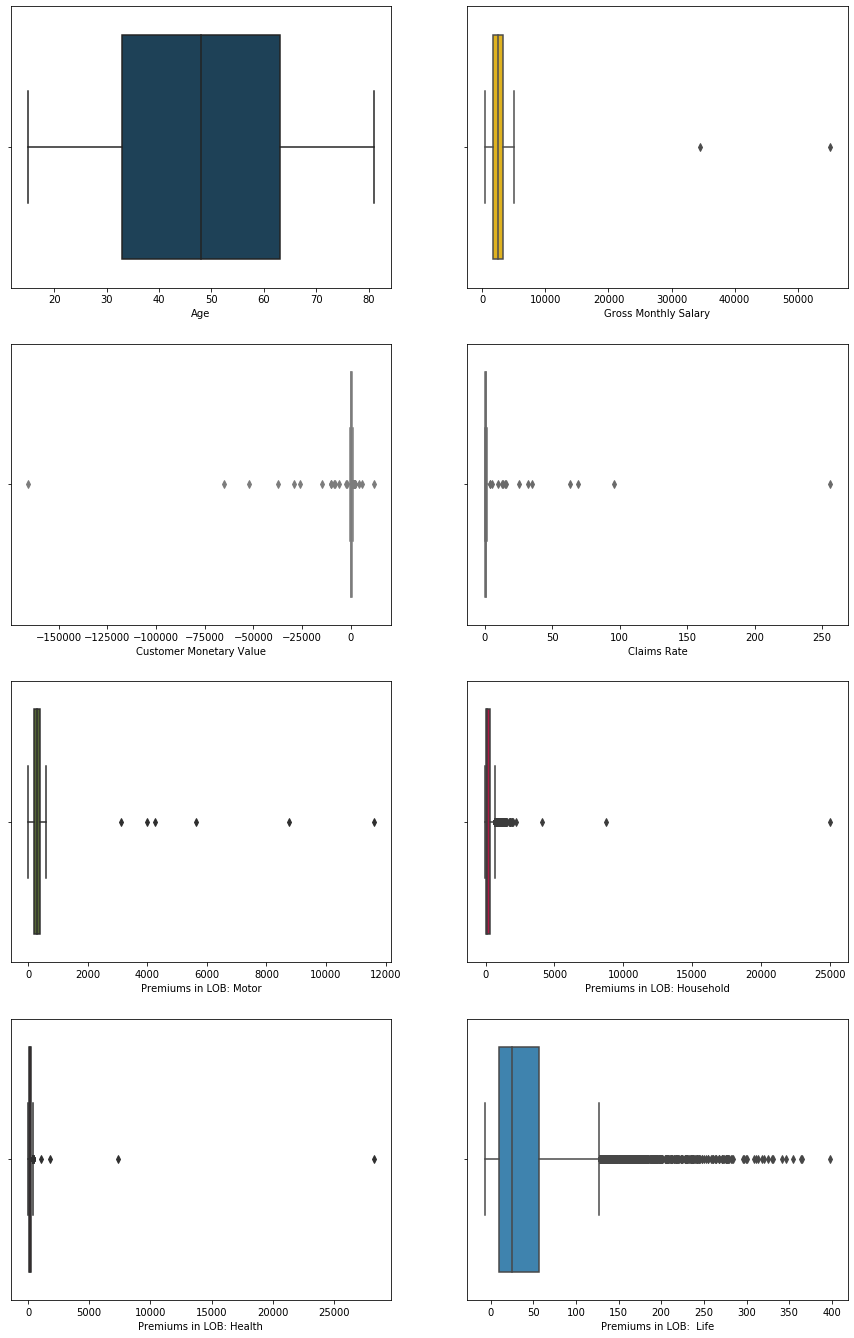

In [31]:
fig = plt.figure(figsize=(15,30))
grid = plt.GridSpec(ncols=2, nrows=5)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[2, 0])
ax6 = fig.add_subplot(grid[2, 1])
ax7 = fig.add_subplot(grid[3, 0])
ax8 = fig.add_subplot(grid[3, 1])
# ax9 = fig.add_subplot(grid[8, 0])

sns.boxplot(x='Age', data=insurance_df, whis = 1.5, color= '#154360', ax=ax1)
sns.boxplot(x='Gross Monthly Salary', data=insurance_df, whis = 1.5, color= '#FFC300', ax=ax2)
sns.boxplot(x='Customer Monetary Value', data=insurance_df, whis = 1.5, color= '#DAF7A6', ax=ax3)
sns.boxplot(x='Claims Rate', data=insurance_df, whis = 1.5, color= '#BEE080', ax=ax4)
sns.boxplot(x='Premiums in LOB: Motor', data=insurance_df, whis = 1.5, color= '#566D2D', ax=ax5)
sns.boxplot(x='Premiums in LOB: Household', data=insurance_df, whis = 1.5, color= '#C70039', ax=ax6)
sns.boxplot(x='Premiums in LOB: Health', data=insurance_df, whis = 1.5, color= '#900C3F', ax=ax7)
sns.boxplot(x='Premiums in LOB:  Life', data=insurance_df, whis = 1.5, color= '#2D87C0', ax=ax8)
# sns.boxplot(x='Premiums in LOB: Work Compensations', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax9)
# sns.boxplot(x='Age when doing first policy', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax11);

For these boxplots, outliers are a little harder to conclude on. For example, looking at the premium in LOB: Health, the amount of outliers is huge, and that's normal, since the premiums depend on a lot of diferent variables. <br>
As for the gross monetary value... Who's to say we don't have a client that earns more than 5000 a month? We can't be sure, and although that value is unusual, it's definetly possible. 
Let's consider the logarithm of these variables and re-check their bloxplots after that transformation.

In [32]:
# def to_log(dataframe,variable):
#     min_val = dataframe[variable].min()
#     newdataframe = dataframe # Creating a copy so we don't change the original
#     if min_val > 1: # Meaning no complications in doing the logarithm
#         newdataframe[variable] = np.log(newdataframe[variable])
#     else:
#         newdataframe[variable] = newdataframe[variable] + round(min_val+1,1)
#         newdataframe[variable] = np.log(newdataframe[variable])
        
#     return newdataframe

# fig = plt.figure(figsize=(20,40))
# grid = plt.GridSpec(ncols=1, nrows=11)
# ax1 = fig.add_subplot(grid[0, 0])
# ax2 = fig.add_subplot(grid[1, 0])
# ax3 = fig.add_subplot(grid[2, 0])
# ax4 = fig.add_subplot(grid[3, 0])
# ax5 = fig.add_subplot(grid[4, 0])
# ax6 = fig.add_subplot(grid[5, 0])
# ax7 = fig.add_subplot(grid[6, 0])
# ax8 = fig.add_subplot(grid[7, 0])
# ax9 = fig.add_subplot(grid[8, 0])
# ax10 = fig.add_subplot(grid[9, 0])
# ax11 = fig.add_subplot(grid[10, 0])   
    
# to_log(insurance_df,'Gross Monthly Salary')
# to_log(insurance_df,'Customer Monetary Value')
# to_log(insurance_df,'Claims Rate')
# sns.boxplot(x='Gross Monthly Salary', data=insurance_df, whis = 1.5, color= '#FFC300', ax=ax3)
# sns.boxplot(x='Customer Monetary Value', data=insurance_df, whis = 1.5, color= '#DAF7A6', ax=ax4)
# sns.boxplot(x='Claims Rate', data=insurance_df, whis = 1.5, color= '#BEE080', ax=ax5)
# sns.boxplot(x='Premiums in LOB: Motor', data=insurance_df, whis = 1.5, color= '#566D2D', ax=ax6)
# sns.boxplot(x='Premiums in LOB: Household', data=insurance_df, whis = 1.5, color= '#C70039', ax=ax7)
# sns.boxplot(x='Premiums in LOB: Health', data=insurance_df, whis = 1.5, color= '#900C3F', ax=ax8)
# sns.boxplot(x='Premiums in LOB:  Life', data=insurance_df, whis = 1.5, color= '#2D87C0', ax=ax9)
# sns.boxplot(x='Premiums in LOB: Work Compensations', data=insurance_df, color= '#91CDF4', whis = 1.5, ax=ax10)

After that checking out each one of the new boxplots, It's noticiable that there are still outliers in most part of out database. We will use Z-score function defined in scipy library to detect the outliers.

In [33]:
insurance_df.columns
insurance_df.dtypes
# We will transform all variables into float to make to ZScore Transformation

Customer Identity                        int64
First Policy´s Year                    float64
Brithday Year                          float64
Educational Degree                      object
Gross Monthly Salary                   float64
Geographic Living Area                 float64
Has Children (Y=1)                     float64
Customer Monetary Value                float64
Claims Rate                            float64
Premiums in LOB: Motor                 float64
Premiums in LOB: Household             float64
Premiums in LOB: Health                float64
Premiums in LOB:  Life                 float64
Premiums in LOB: Work Compensations    float64
Age                                    float64
Client_Spend                           float64
Fidelity                               float64
dtype: object

In [34]:
from scipy import stats
import numpy as np

zvariables = insurance_df_ct[['Age','Customer Monetary Value',
 'Claims Rate',
 'Premiums in LOB: Motor',
 'Premiums in LOB: Household',
 'Premiums in LOB: Health',
 'Premiums in LOB:  Life',
 'Premiums in LOB: Work Compensations',
                             'Gross Monthly Salary']]
#'Age'
                             
zvariables
                 
z = np.abs(stats.zscore(zvariables))
z

threshold = 3
# np.where(z > 3) # We noticed that there are outliers in each one of the variables

<b style="color:#FF5733">Treating the Ouliers from our database</b>

In [35]:
list(insurance_df_ct.columns)

['Customer Identity',
 'First Policy´s Year',
 'Brithday Year',
 'Educational Degree',
 'Gross Monthly Salary',
 'Geographic Living Area',
 'Has Children (Y=1)',
 'Customer Monetary Value',
 'Claims Rate',
 'Premiums in LOB: Motor',
 'Premiums in LOB: Household',
 'Premiums in LOB: Health',
 'Premiums in LOB:  Life',
 'Premiums in LOB: Work Compensations',
 'Age',
 'Client_Spend',
 'Fidelity']

We saw how one can detect the outlier using Z-score but now we want to remove the outliers and get the clean data. 

In [36]:
# Now we are going to clean out outliers based on the Z scores

zvariables1 = zvariables[(z < 3.8).all(axis=1)]

print(zvariables.shape)
print(zvariables1.shape)
index1 = zvariables1.index

(10264, 9)
(10058, 9)


In [37]:
zvariables1

,Age,Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Gross Monthly Salary
0,34.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,2177.0
1,21.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,677.0
2,46.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,2277.0
3,35.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,1099.0
4,43.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,1763.0
...,...,...,...,...,...,...,...,...,...
10291,67.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,3188.0
10292,64.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13,2431.0
10293,40.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89,2918.0
10294,39.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91,1971.0


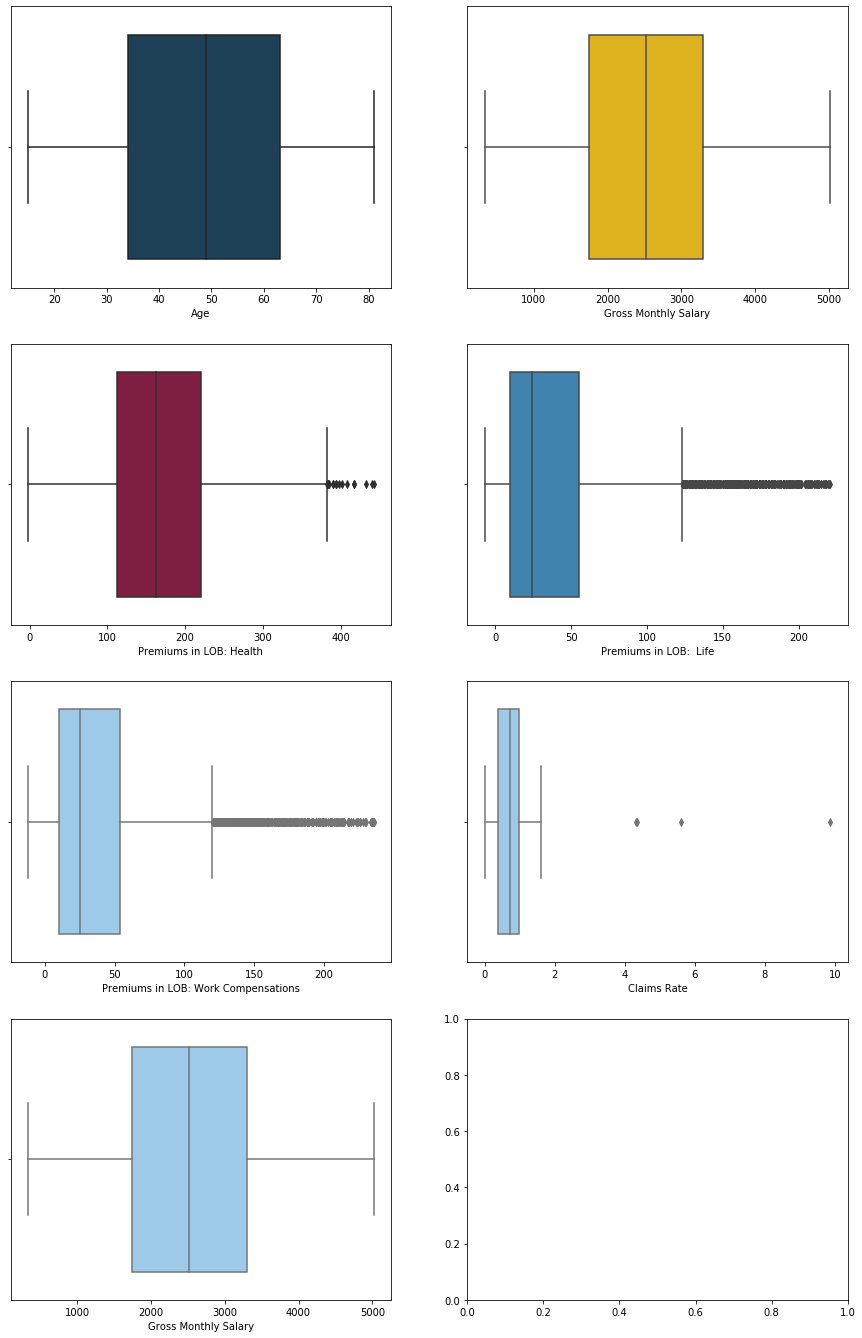

In [38]:
fig = plt.figure(figsize=(15,30))
grid = plt.GridSpec(ncols=2, nrows=5)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
ax5 = fig.add_subplot(grid[2, 0])
ax6 = fig.add_subplot(grid[2, 1])
ax7 = fig.add_subplot(grid[3, 0])
ax8 = fig.add_subplot(grid[3, 1])

sns.boxplot(x='Age', data=zvariables1, whis = 1.5, color= '#154360', ax=ax1)
sns.boxplot(x='Gross Monthly Salary', data=zvariables1, whis = 1.5, color= '#FFC300', ax=ax2)
# sns.boxplot(x='Premiums in LOB: Motor', data=zvariables1, whis = 1.5, color= '#566D2D', ax=ax1)
# sns.boxplot(x='Premiums in LOB: Household', data=zvariables1, whis = 1.5, color= '#C70039', ax=ax2)
sns.boxplot(x='Premiums in LOB: Health', data=zvariables1, whis = 1.5, color= '#900C3F', ax=ax3)
sns.boxplot(x='Premiums in LOB:  Life', data=zvariables1, whis = 1.5, color= '#2D87C0', ax=ax4)
sns.boxplot(x='Premiums in LOB: Work Compensations', data=zvariables1, color= '#91CDF4', whis = 1.5, ax=ax5)
sns.boxplot(x='Claims Rate', data=zvariables1, color= '#91CDF4', whis = 1.5, ax=ax6)
sns.boxplot(x='Gross Monthly Salary', data=zvariables1, color= '#91CDF4', whis = 1.5, ax=ax7)

Now we will build the new dataFrame without the outliers 

In [39]:
index1.size # I want those indexs from my original database 
insurance_df_ct.index.size
insurance_df_ct

insurance_dff = insurance_df_ct[insurance_df_ct.index.isin(index1)] # DataFrame Without the Outliears
print(insurance_dff.shape)
insurance_outliers = insurance_df_ct[insurance_df_ct.index.isin(index1) == False] # DataFrame Without the Outliers
print(insurance_outliers.shape)

(10058, 17)
(206, 17)


In [40]:
insurance_df_ct = insurance_dff
insurance_df_ct

,Customer Identity,First Policy´s Year,Brithday Year,Educational Degree,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age,Client_Spend,Fidelity
0,1,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,665.56,31.0
1,2,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,21.0,910.96,35.0
2,3,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,740.60,25.0
3,4,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,600.68,26.0
4,5,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,629.24,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292,1984.0,1949.0,4 - PhD,3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,67.0,641.56,32.0
10292,10293,1977.0,1952.0,1 - Basic,2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13,64.0,1430.60,39.0
10293,10294,1994.0,1976.0,3 - BSc/MSc,2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89,40.0,696.24,22.0
10294,10295,1981.0,1977.0,1 - Basic,1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91,39.0,774.92,35.0


## 2. Methodology


In [41]:
insurance_df_ct.describe()

,Customer Identity,First Policy´s Year,Brithday Year,Gross Monthly Salary,Geographic Living Area,Has Children (Y=1),Customer Monetary Value,Claims Rate,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Age,Client_Spend,Fidelity
count,10058.000000,10058.000000,10044.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000,10058.000000
mean,5146.270730,1986.012229,1967.708284,2518.552837,2.709087,0.708391,215.792538,0.681569,300.152845,202.156308,168.202042,39.011911,38.695358,48.291154,748.218465,29.987771
std,2970.867682,6.605817,17.168201,972.637951,1.266859,0.454526,263.237793,0.338073,136.264522,228.373174,74.858441,41.911596,42.123355,17.156253,188.581906,6.605817
min,1.000000,1974.000000,1935.000000,333.000000,1.000000,0.000000,-6115.850000,0.000000,-4.110000,-75.000000,-2.110000,-7.000000,-12.000000,15.000000,0.000000,18.000000
25%,2573.250000,1980.000000,1953.000000,1745.250000,1.000000,0.000000,-9.075000,0.390000,196.647500,48.900000,111.910000,9.780000,9.890000,34.000000,625.680000,24.000000
50%,5142.500000,1986.000000,1967.000000,2517.500000,3.000000,1.000000,186.150000,0.720000,302.280000,131.700000,163.030000,24.560000,25.340000,49.000000,695.360000,30.000000
75%,7715.750000,1992.000000,1982.000000,3295.000000,4.000000,1.000000,397.937500,0.980000,409.190000,284.500000,219.930000,55.010000,54.120000,63.000000,819.717500,36.000000
max,10296.000000,1998.000000,2001.000000,5021.000000,4.000000,1.000000,1571.760000,9.870000,585.220000,1544.750000,442.860000,220.930000,235.710000,81.000000,1809.690000,42.000000


## 3. Univariate Analysis

In [42]:
# Chaging styles
colors = ["#154360","#FF5733","#FFC300","#DAF7A6"]
sns.set_palette(sns.color_palette(colors))
sns.set_style('whitegrid')


   ##### Educational Degree

In [43]:
insurance_df['Educational Degree'].value_counts().sum() #No NA's
insurance_df['Educational Degree'].value_counts()

3 - BSc/MSc        4793
2 - High School    3506
1 - Basic          1270
4 - PhD             695
Name: Educational Degree, dtype: int64

##### Has Children

In [44]:
insurance_df['Has Children (Y=1)'].value_counts().sum() #No NA's
insurance_df['Has Children (Y=1)'].value_counts()

1.0    7261
0.0    3003
Name: Has Children (Y=1), dtype: int64

#### Geographic Living Area

In [45]:
insurance_df['Geographic Living Area'].value_counts().sum() #No NA's
insurance_df['Geographic Living Area'].value_counts()

4.0    4139
1.0    3035
3.0    2063
2.0    1027
Name: Geographic Living Area, dtype: int64

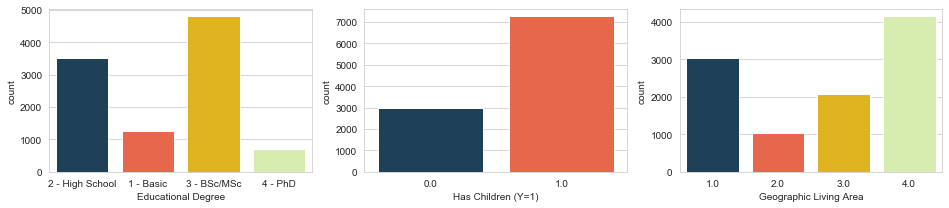

In [46]:
fig = plt.figure(figsize=(16,3))
grid = plt.GridSpec(ncols=3, nrows=1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[0, 2])
sns.countplot(x='Educational Degree', data=insurance_df, ax=ax1)
sns.countplot(x='Has Children (Y=1)', data=insurance_df,ax=ax2)
sns.countplot(x='Geographic Living Area', data=insurance_df, ax=ax3)

#### BirthDate

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\User\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



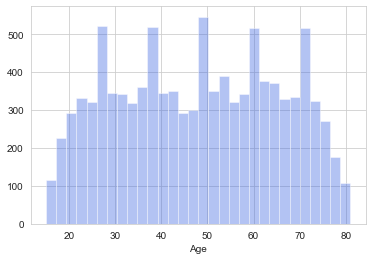

In [47]:
sns.distplot(insurance_df['Age'],bins=30,kde=False,color='RoyalBlue')

#### Gross Monthly Salary

In [48]:
insurance_df['Gross Monthly Salary']
insurance_df['Gross Monthly Salary'].describe()
sum(insurance_df['Gross Monthly Salary'].isnull()) # 34 NA's
insurance_df['Gross Monthly Salary'].describe()
insurance_df['Gross Monthly Salary'].fillna(0)

0        2177.0
1         677.0
2        2277.0
3        1099.0
4        1763.0
          ...  
10291    3188.0
10292    2431.0
10293    2918.0
10294    1971.0
10295    2815.0
Name: Gross Monthly Salary, Length: 10264, dtype: float64

#### Premiums (Euros) 

In [49]:
insurance_df.info()
insurance_df['Premiums in LOB: Motor']
insurance_df['Premiums in LOB: Household']
insurance_df['Premiums in LOB: Health']
insurance_df['Premiums in LOB:  Life']
insurance_df['Premiums in LOB: Work Compensations']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10264 entries, 0 to 10295
Data columns (total 17 columns):
Customer Identity                      10264 non-null int64
First Policy´s Year                    10264 non-null float64
Brithday Year                          10250 non-null float64
Educational Degree                     10264 non-null object
Gross Monthly Salary                   10230 non-null float64
Geographic Living Area                 10264 non-null float64
Has Children (Y=1)                     10264 non-null float64
Customer Monetary Value                10264 non-null float64
Claims Rate                            10264 non-null float64
Premiums in LOB: Motor                 10264 non-null float64
Premiums in LOB: Household             10264 non-null float64
Premiums in LOB: Health                10264 non-null float64
Premiums in LOB:  Life                 10264 non-null float64
Premiums in LOB: Work Compensations    10264 non-null float64
Age                       

0         16.89
1        106.13
2         99.02
3         28.34
4         41.45
          ...  
10291     14.78
10292    105.13
10293      4.89
10294    112.91
10295     12.89
Name: Premiums in LOB: Work Compensations, Length: 10264, dtype: float64

## 4. Multivariate Analysis

In [50]:
insurance_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10264 entries, 0 to 10295
Data columns (total 17 columns):
Customer Identity                      10264 non-null int64
First Policy´s Year                    10264 non-null float64
Brithday Year                          10250 non-null float64
Educational Degree                     10264 non-null object
Gross Monthly Salary                   10230 non-null float64
Geographic Living Area                 10264 non-null float64
Has Children (Y=1)                     10264 non-null float64
Customer Monetary Value                10264 non-null float64
Claims Rate                            10264 non-null float64
Premiums in LOB: Motor                 10264 non-null float64
Premiums in LOB: Household             10264 non-null float64
Premiums in LOB: Health                10264 non-null float64
Premiums in LOB:  Life                 10264 non-null float64
Premiums in LOB: Work Compensations    10264 non-null float64
Age                       

Lets study the correlation between each one of the ratio variables

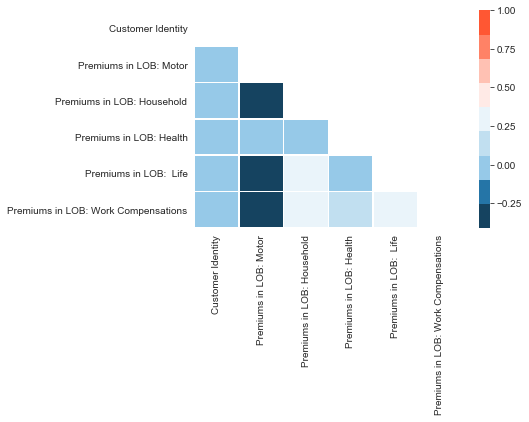

In [51]:
insurance_corr = insurance_df[premiums].corr()
insurance_corr
#Correlation plot
mask = np.zeros_like(insurance_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#  #Colors
cmap = sns.diverging_palette(240, 10, n=9,)
# # #Plotting the heatmap
sns.heatmap(insurance_corr, mask=mask, linewidths=.5, cmap = ["#154360","#2575a7","#96c9e8","#c1dff0","#eaf4fa","#ffeae6","#ffc1b3","#ff8266","#FF5733"]
)
#Low correlations but we can consider a small correlation between 
#"Premiums in LOB: Motor" and Premiums in LOB: Work Compensations

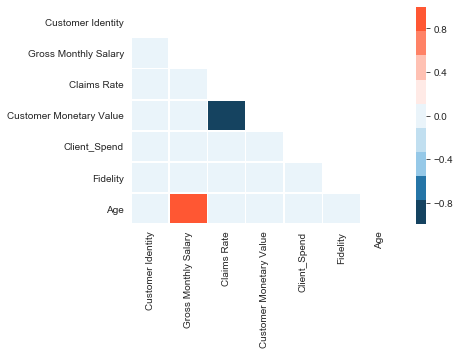

In [52]:
insurance_corr = insurance_df[customer].corr()
insurance_corr
#Correlation plot
mask = np.zeros_like(insurance_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#  #Colors
cmap = sns.diverging_palette(240, 10, n=9)
# # #Plotting the heatmap
sns.heatmap(insurance_corr, mask=mask, linewidths=.5, cmap = ["#154360","#2575a7","#96c9e8","#c1dff0","#eaf4fa","#ffeae6","#ffc1b3","#ff8266","#FF5733"]
)

We noticed that there's no high correlation between each one the Premiums, so we'll keep working on others creations.
We will calculate the Contingency coefficient of each one the Categorical variables with the continuous variables.

In [53]:
#nominals = insurance_df[['Educational Degree','Geographic Living Area','Has Children (Y=1)']]

In [54]:
from scipy.stats import chisquare

#Educational Degree and Geographic Living Area
data_crosstab1 = pd.crosstab(insurance_df['Educational Degree'], insurance_df['Geographic Living Area'] , 
                               margins = False) 
print(data_crosstab1) 

print(chisquare(data_crosstab1))

#Educational Degree and Has Children
data_crosstab2 = pd.crosstab(insurance_df['Educational Degree'], insurance_df['Has Children (Y=1)'] , 
                               margins = False) 
print(data_crosstab2) 

print(chisquare(data_crosstab2))

#Geographic Living Area and Has Children
data_crosstab3 = pd.crosstab(insurance_df['Geographic Living Area'], insurance_df['Has Children (Y=1)'] , 
                               margins = False) 
print(data_crosstab3) 

print(chisquare(data_crosstab3))

Geographic Living Area   1.0  2.0  3.0   4.0
Educational Degree                          
1 - Basic                375  125  255   515
2 - High School         1012  354  681  1459
3 - BSc/MSc             1430  478  988  1897
4 - PhD                  218   70  139   268
Power_divergenceResult(statistic=array([1257.84085667,  430.93573515,  892.40668929, 1721.68035757]), pvalue=array([2.06740797e-272, 4.40194599e-093, 3.92696404e-193, 0.00000000e+000]))
Has Children (Y=1)   0.0   1.0
Educational Degree            
1 - Basic            377   893
2 - High School     1027  2479
3 - BSc/MSc         1393  3400
4 - PhD              206   489
Power_divergenceResult(statistic=array([1232.42191142, 3063.75471698]), pvalue=array([6.77101813e-267, 0.00000000e+000]))
Has Children (Y=1)       0.0   1.0
Geographic Living Area            
1.0                      847  2188
2.0                      308   719
3.0                      585  1478
4.0                     1263  2876
Power_divergenceResult(sta

## 5. Clustering

#### K- MEANS AND K-MODES AND HIERARCHICAL


#### Customers

In [55]:
cust_clust = insurance_df_ct[customer].loc[:,insurance_df_ct[customer].columns != "Customer Identity"]

In [56]:
list(cust_clust)

['Gross Monthly Salary',
 'Claims Rate',
 'Customer Monetary Value',
 'Client_Spend',
 'Fidelity',
 'Age']

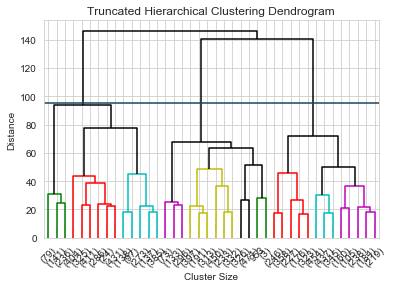

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
CA_Norm = scaler.fit_transform(cust_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = cust_clust.columns)
Z = linkage(CA_Norm,
            method = 'ward')

dendrogram(Z,
            #truncate_mode='none',
            truncate_mode='lastp',
            p=40,
            orientation = 'top',
            leaf_rotation=45.,
            leaf_font_size=10.,
            show_contracted=True,
            show_leaf_counts=True, color_threshold=50, above_threshold_color='k')


plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=95)
plt.show()

Because of the hierarchical dendogram, we observed that we need two clusters to describe our data related to the "customers"

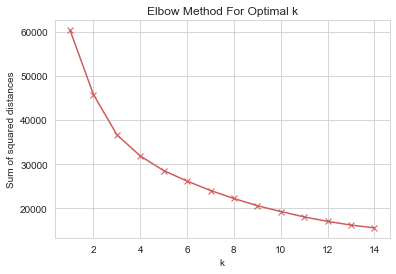

In [58]:
#KMEANS For Customers
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(cust_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = cust_clust.columns)

from sklearn.cluster import KMeans
n_clusters_for_customers = 3

kmeans = KMeans(n_clusters= 3, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)


my_clusters = kmeans.cluster_centers_

scaler.inverse_transform( X = my_clusters)
my_clusters = pd.DataFrame(scaler.inverse_transform(X = my_clusters), columns = cust_clust.columns)
# Check the Clusters

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(CA_Norm)
    Sum_of_squared_distances.append(km.inertia_)

import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

# 'First Policy´s Year','Brithday Year','Gross Monthly Salary','Claims Rate','Customer Monetary Value',
y = kmeans.fit_predict(cust_clust)

insurance_df_ct['Cluster'] = y

kmeansC = kmeans

#Plot Elbow Method
plt.plot(K, Sum_of_squared_distances, 'bx-', color='indianred')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


For n_clusters = 3 The average silhouette_score is : 0.12313641139792739


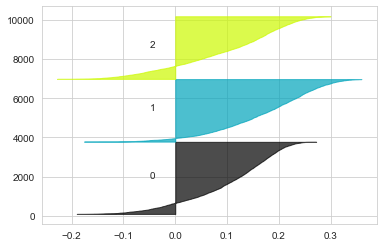

In [59]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(CA_Norm, kmeans.labels_)
print("For n_clusters =", n_clusters_for_customers,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(CA_Norm, kmeans.labels_)

cluster_labels = kmeans.labels_

import matplotlib.cm as cm
y_lower = 100

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(n_clusters_for_customers):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values. shape[0]
    y_upper = y_lower + size_cluster_i
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters_for_customers)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

#### Premium

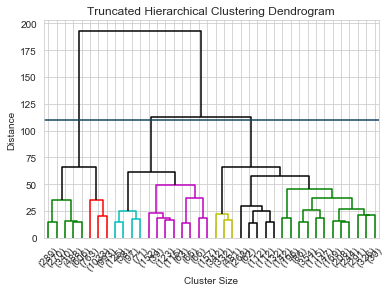

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

prem_clust = insurance_df_ct[premiums].loc[:,insurance_df_ct[premiums].columns != "Customer Identity"]

scaler = StandardScaler()
CA_Norm = scaler.fit_transform(prem_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = prem_clust.columns)
Z = linkage(CA_Norm,
            method = 'ward')

dendrogram(Z,
            #truncate_mode='none',
            truncate_mode='lastp',
            p=40,
            orientation = 'top',
            leaf_rotation=45.,
            leaf_font_size=10.,
            show_contracted=True,
            show_leaf_counts=True, color_threshold=50, above_threshold_color='k')


plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=110)
plt.show()

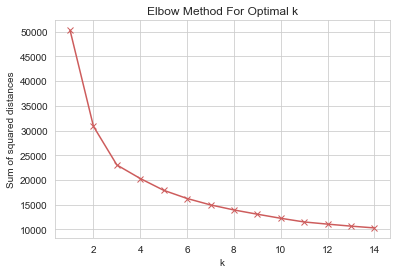

In [61]:
#KMEANS For Premiums
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(prem_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = prem_clust.columns)

from sklearn.cluster import KMeans
n_clusters_for_customers = 2

kmeans = KMeans(n_clusters= 2, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)


my_clusters = kmeans.cluster_centers_

scaler.inverse_transform( X = my_clusters)
my_clusters = pd.DataFrame(scaler.inverse_transform(X = my_clusters), columns = prem_clust.columns)
# Check the Clusters
kmeansP = kmeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(CA_Norm)
    Sum_of_squared_distances.append(km.inertia_)

import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

y = kmeans.fit_predict(prem_clust)

insurance_df_ct['Cluster'] = y



#Plot Elbow Method
plt.plot(K, Sum_of_squared_distances, 'bx-', color='indianred')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.3488858773234212


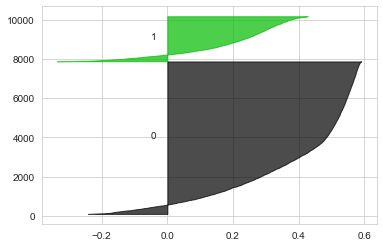

In [62]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(CA_Norm, kmeans.labels_)
print("For n_clusters =", n_clusters_for_customers,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(CA_Norm, kmeans.labels_)

cluster_labels = kmeans.labels_

import matplotlib.cm as cm
y_lower = 100

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(n_clusters_for_customers):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i=ith_cluster_silhouette_values. shape[0]
    y_upper = y_lower + size_cluster_i
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters_for_customers)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

In [ ]:
# plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [ ]:
len(X)

#### Clusterization of the Nominal of the costumers

In [165]:
nominal_clust = insurance_df_ct[nominal].loc[:,insurance_df_ct[nominal].columns != "Customer Identity"]

In [166]:
#KMODES for Nominal
from kmodes.kmodes import KModes
VE_Cat = insurance_df_ct[['Educational Degree','Geographic Living Area','Has Children (Y=1)']].astype('str')

# for j in list(VE_Cat):
#     for i in range(VE_Cat.shape[0]):
#         if VE_Cat.loc[i,j] =='':
#             VE_Cat.loc[i,j] = 'Missing'

km = KModes(n_clusters=3, init='random', n_init=50, verbose=1)

clusters = km.fit_predict(VE_Cat)

kmodesD = km 

# Print the cluster centroids
print(km.cluster_centroids_)
cat_centroids = pd.DataFrame(km.cluster_centroids_,
                             columns = ['Educational Degree','Geographic Living Area','Has Children (Y=1)'])

unique, counts = np.unique(km.labels_, return_counts=True)

cat_counts = pd.DataFrame(np.asarray((unique, counts)).T, columns = ['Label','Number'])

cat_centroids = pd.concat([cat_centroids, cat_counts], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1814, cost: 10179.0
Run 2, iteration: 2/100, moves: 593, cost: 10179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8711.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9849.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2451, cost: 9223.0
Run 5, iteration: 2/100, moves: 0, cost: 9223.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 9062.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 1798, cost: 9

In [ ]:
cat_centroids 

### Self Organizing Maps ###

#### Customer ####

In [ ]:
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[customer])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[customer].columns)

X = CA_Norm.values
X

sm = SOMFactory().build(data = X,
               mapsize=(10,10), #size of the neurons
               normalization = 'var',
               initialization='random',#'random', 'pca'
               lattice='hexa',#'rect','hexa'
               training ='seq' )#'seq','batch'

sm.train(n_job=4,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)

final_clusters = pd.DataFrame(sm._data, columns = insurance_df_ct[customer].columns)

my_labels = pd.DataFrame(sm._bmu[0])
    
final_clusters = pd.concat([final_clusters,my_labels], axis = 1)


In [ ]:
# Graphs
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()


from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)



# K-Means Clustering
from sompy.visualization.hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)


#### Premium ####

In [ ]:
from sompy.sompy import SOMFactory
from sompy.visualization.plot_tools import plot_hex_map
import logging
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[premiums])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[premiums].columns)

X = CA_Norm.values
X

sm = SOMFactory().build(data = X,
               mapsize=(10,10), #size of the neurons
               normalization = 'var',
               initialization='random',#'random', 'pca'
               lattice='hexa',#'rect','hexa'
               training ='seq' )#'seq','batch'

sm.train(n_job=4,
         verbose='info',
         train_rough_len=30,
         train_finetune_len=100)

final_clusters = pd.DataFrame(sm._data, columns = insurance_df_ct[premiums].columns)

my_labels = pd.DataFrame(sm._bmu[0])
    
final_clusters = pd.concat([final_clusters,my_labels], axis = 1)


In [ ]:
# Graphs Premium
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"", text_size=7)
view2D.show(sm, col_sz=5, what = 'codebook',)#which_dim="all", denormalize=True)
plt.show()


from sompy.visualization.bmuhits import BmuHitsView
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)



# K-Means Clustering
from sompy.visualization.hitmap import HitMapView
sm.cluster(3)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)


### DB Scan ###

#### Customer  ####

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[customer])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[customer].columns)

X = CA_Norm.values
X

db = DBSCAN(eps= 1, #Tamanho dos meus eps (define a quantidade de clusters)
            min_samples=10).fit(CA_Norm)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters))) # Two Clusters

#Applying PCA To plot the clusterization

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(CA_Norm)
pca_2d = pca.transform(CA_Norm)

for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif db.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    elif db.labels_[i] == 3:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    elif db.labels_[i] == 4:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    elif db.labels_[i] == 5:
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1,c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()


there are unbalanced Clusters with this technique

#### Premiums ####

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[premiums])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[premiums].columns)

X = CA_Norm.values
X

db = DBSCAN(eps= 1, #Tamanho dos meus eps (define a quantidade de clusters)
            min_samples=10).fit(CA_Norm)

labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters))) # Two Clusters

#Applying PCA To plot the clusterization

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(CA_Norm)
pca_2d = pca.transform(CA_Norm)

for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif db.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    elif db.labels_[i] == 3:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    elif db.labels_[i] == 4:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    elif db.labels_[i] == 5:
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()


there are unbalanced Clusters with this technique as well (because we have a continuous dataset)

### Mean Shift ###

#### Customer ####

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[customer])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[customer].columns)


to_MS = CA_Norm
# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(to_MS,
                               quantile=0.2,
                               n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.15,
               bin_seeding=True)

ms.fit(to_MS)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


#Values
scaler.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

# lets check our are they distributed

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(to_MS)
pca_2d = pca.transform(to_MS)
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Cluster 3 '])
plt.title('Mean Shift found 3 clusters')
plt.show()


#### Premiums ####


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

scaler = StandardScaler()

CA_Norm = scaler.fit_transform(insurance_df_ct[premiums])
CA_Norm = pd.DataFrame(CA_Norm, columns = insurance_df_ct[premiums].columns)

# The following bandwidth can be automatically detected using
my_bandwidth = estimate_bandwidth(to_MS,
                               quantile=0.2,
                               n_samples=1000)

ms = MeanShift(bandwidth=my_bandwidth,
               #bandwidth=0.15,
               bin_seeding=True)

ms.fit(to_MS)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)


#Values
scaler.inverse_transform(X=cluster_centers)

#Count
unique, counts = np.unique(labels, return_counts=True)

print(np.asarray((unique, counts)).T)

# lets check our are they distributed

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(to_MS)
pca_2d = pca.transform(to_MS)
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Cluster 3 '])
plt.title('Mean Shift found 3 clusters')
plt.show()



We didn't got balanced clusters with this technique in both databases (continuous data)

### Clustering merging ###

In [64]:
def clust_num(df,n):
    
    cluster_test = df.loc[:, df.columns !='Customer Identity']
    scaler = preprocessing.MinMaxScaler()
    cluster = scaler.fit_transform(cluster_test)
    cluster = pd.DataFrame(cluster, columns = cluster_test.columns)
    
    kmeans = KMeans(n_cluster = n,
                    random_state = 0,
                    n_init = 5,
                    max_iter = 200).fit(cluster)
    
    my_clusters = kmeans.cluster_centers_
    centers_norm = my_clusters
    my_clusters = scaler.inverse_transform(X = my_clusters)
    num_centroids = pd.DataFrame(my_clusters, columns = cluster_test.columns)
    centers_norm = pd.DataFrame(centers_norm, columns = cluster_test.columns)
    
    kmeans_list = kmeans.fit_predict(cluster_test)
    
    unique, counts = np.unique(kmeans.labels_, return_counts = True)
    num_counts = pd.DataFrame(np.asarray((unique,counts)).T,columns = ['Label','Number'])
    
    merged = pd.merge(df, pd.DataFrame(kmeans_list), right_index = True, left_index = True)
    
    return merged, num_counts, num_centroids, centers_norm

### Cluster Labeling ###

In [65]:
insurance_premium = insurance_df_ct[premiums]
insurance_customer = insurance_df_ct[customer]
insurance_nominal = insurance_df_ct[nominal]

### Premium ###

In [66]:
Affinity_P = pd.DataFrame(pd.concat([insurance_premium, pd.DataFrame(kmeansP.labels_)],axis=1))
Affinity_P
Affinity_P.columns =  ['Customer Identity','Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations', 'P_Label']
# Affinity_P['P_Label'].value_counts()


### Customer ###

In [67]:
insurance_customer.columns

Index(['Customer Identity', 'Gross Monthly Salary', 'Claims Rate',
       'Customer Monetary Value', 'Client_Spend', 'Fidelity', 'Age'],
      dtype='object')

In [68]:
Affinity_C = pd.DataFrame(pd.concat([insurance_customer, pd.DataFrame(kmeansC.labels_)],axis=1))
Affinity_C
Affinity_C.columns =  ['Customer Identity', 'Gross Monthly Salary', 'Claims Rate',
       'Customer Monetary Value', 'Client Spend','Fidelity','Age','C_Label']
Affinity_C['C_Label'].value_counts()


0.0    3676
2.0    3194
1.0    3188
Name: C_Label, dtype: int64

### Nominal ###

In [69]:
insurance_nominal.columns

Index(['Customer Identity', 'Educational Degree', 'Geographic Living Area',
       'Has Children (Y=1)'],
      dtype='object')

In [70]:
Affinity_N = pd.DataFrame(pd.concat([insurance_nominal, pd.DataFrame(kmodesD.labels_)],axis=1))
Affinity_N
Affinity_N.columns =  ['Customer Identity', 'Educational Degree', 'Geographic Living Area',
       'Has Children (Y=1)','N_Label']
sum(Affinity_N['N_Label'].isna())
Affinity_N['N_Label'].value_counts()


NameError: name 'kmodesD' is not defined

In [ ]:
# We got all the databases
Affinity_P
Affinity_C
Affinity_N
# Let's reset those indexes
Affinity_P = Affinity_P.set_index('Customer Identity')
Affinity_C = Affinity_C.set_index('Customer Identity')
Affinity_N = Affinity_N.set_index('Customer Identity')


In [71]:
Cluster = pd.concat([Affinity_P, Affinity_C,Affinity_N], axis=1)
Cluster
Cluster1 = Cluster[Cluster['P_Label'].isna() == False]
Cluster1 
# Cluster1.head(10058)
#Shape (10058, 16)
# Cluster2 = Cluster1[:10058]
# Cluster2 
# sum(Cluster1['P_Label'].isna())

NameError: name 'Affinity_N' is not defined

In [72]:
# Transforming out labels in Categorized variables
# Cluster1['C_Label'] = Cluster1['C_Label'].astype('category')
# Cluster1['P_Label'] = Cluster1['P_Label'].astype('category')
# Cluster1['N_Label'] = Cluster1['N_Label'].astype('category')
# Cluster1

In [190]:
Cluster1.shape


(10058, 17)

## Profiling

Now that we have all of the DataSets, let's study all the clusters

In [191]:
Crosscluster1 = pd.crosstab(Cluster1['P_Label'], Cluster1['C_Label'], 
                               margins = False) 
Crosscluster1


C_Label,0.0,1.0,2.0
P_Label,,,
0.0,3302,2499,1966
1.0,374,689,1228


In [192]:
Crosscluster2 = pd.crosstab(Cluster1['P_Label'], Cluster1['N_Label'], 
                               margins = False) 
Crosscluster2

N_Label,0.0,1.0,2.0
P_Label,,,
0.0,4130,2137,1500
1.0,1459,347,485


In [173]:
Crosscluster3 = pd.crosstab(Cluster1['C_Label'], Cluster1['N_Label'], 
                               margins = False) 
Crosscluster3

N_Label,0.0,1.0,2.0
C_Label,,,
0.0,2183,1172,321
1.0,1382,388,1418
2.0,2024,924,246


In [193]:
crostab_f = pd.crosstab(Cluster1['C_Label'], [Cluster1['P_Label'], Cluster1['N_Label']])
crostab_f

P_Label   0.0              1.0          
N_Label   0.0   1.0   2.0  0.0  1.0  2.0
C_Label                                 
0.0      1920  1110   272  263   62   49
1.0      1015   355  1129  367   33  289
2.0      1195   672    99  829  252  147

#### Marketing Approach and decision

Let's minimize the number of clusters based on the Crosstabs

In [194]:
dff = Cluster1
dff.columns

Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations', 'P_Label',
       'Gross Monthly Salary', 'Claims Rate', 'Customer Monetary Value',
       'Client Spend', 'Fidelity', 'Age', 'C_Label', 'Educational Degree',
       'Geographic Living Area', 'Has Children (Y=1)', 'N_Label'],
      dtype='object')

In [195]:
Crosscluster1

C_Label,0.0,1.0,2.0
P_Label,,,
0.0,3302,2499,1966
1.0,374,689,1228


In [196]:
pd.crosstab(dff['P_Label'], dff['C_Label'], 
                               margins = False) 
# pd.crosstab(dff['N_Label'], dff['C_Label'], 
#                                margins = False) 
# pd.crosstab(dff['P_Label'], dff['N_Label'], 
#                                margins = False) 
# dff['P_Label'].value_counts()

C_Label,0.0,1.0,2.0
P_Label,,,
0.0,3302,2499,1966
1.0,374,689,1228


Now that we will analyse each one the variables inside the clusters

In [ ]:
crostab_f

#### Let's create the new DF with the clusters

In [285]:
#Split the ratio into three parts
customer = ['Customer Identity','Gross Monthly Salary','Claims Rate','Customer Monetary Value','Age','Fidelity']
premiums = ['Customer Identity','Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
         'Premiums in LOB:  Life','Premiums in LOB: Work Compensations']
nominal = ['Customer Identity','Educational Degree','Geographic Living Area','Has Children (Y=1)']

In [275]:
dff1 = dff
ratio = ['F_label','Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
         'Premiums in LOB:  Life','Premiums in LOB: Work Compensations','Gross Monthly Salary','Claims Rate','Customer Monetary Value']
categorical = ['F_label','Educational Degree','Geographic Living Area','Has Children (Y=1)']

In [286]:
dff2 = dff1[categorical]
dff2
pd.crosstab(dff2['F_label'], dff2['Educational Degree'], 
                               margins = False)
pd.crosstab(dff2['F_label'], dff2['Geographic Living Area'], 
                               margins = False)
pd.crosstab(dff2['F_label'], dff2['Has Children (Y=1)'], 
                               margins = False)

Has Children (Y=1),0.0,1.0
F_label,,
0.00.00.0,532,1345
0.00.01.0,279,712
0.00.02.0,324,844
0.01.00.0,322,757
0.01.01.0,106,242
0.01.02.0,194,460
0.02.00.0,75,190
0.02.01.0,339,758
0.02.02.0,23,75


In [294]:
# Test
# dff['F_label'].replace(to_replace = {
# '0.00.00.0'     : 'Cluster1',
# "0.00.02.0"     : 'Cluster3',
# "0.02.01.0"     : 'Cluster2',
# "0.01.00.0"     : 'Cluster4',
# "0.00.01.0"     : 'Cluster4',
# "1.00.02.0"      : 'Cluster5',
# "0.01.02.0"      : 'Cluster3',
# "1.00.01.0"      : 'Cluster5',
# "0.01.01.0"      : 'Cluster2',
# "1.02.01.0"      : 'Cluster5',
# "0.02.00.0"      : 'Cluster2',
# "1.00.00.0"      : 'Cluster2',
# "1.01.02.0"      : 'Cluster5',
# "1.02.02.0"      : 'Cluster5',
# "0.02.02.0"       : 'Cluster5',
# "1.01.00.0"       : 'Cluster1',
# "1.02.00.0"       : 'Cluster1',
# "1.01.01.0"     : 'Cluster2'                 
# }, inplace=True
# )

In [295]:
dff['F_label'].value_counts()

Cluster4    2125
Cluster2    2052
Cluster1    2031
Cluster5    1983
Cluster3    1867
Name: F_label, dtype: int64

In [63]:
dff1 = dff
ratio = ['F_label','Premiums in LOB: Motor','Premiums in LOB: Household','Premiums in LOB: Health',
         'Premiums in LOB:  Life','Premiums in LOB: Work Compensations','Gross Monthly Salary','Claims Rate','Customer Monetary Value',"Client Spend"]
categorical = ['F_label','Educational Degree','Geographic Living Area','Has Children (Y=1)']
dff1

NameError: name 'dff' is not defined

In [222]:
dff1[ratio].groupby('F_label').mean()

,Premiums in LOB: Motor,Premiums in LOB: Household,Premiums in LOB: Health,Premiums in LOB: Life,Premiums in LOB: Work Compensations,Gross Monthly Salary,Claims Rate,Customer Monetary Value,Client Spend
F_label,,,,,,,,,
0.00.00.0,298.543506,203.793420,169.382259,38.702168,37.855610,2533.270202,0.680666,214.996201,748.276963
0.00.01.0,298.683431,213.516599,167.186942,40.074945,38.770061,2486.151619,0.664662,228.805419,758.231978
0.00.02.0,299.399041,203.682363,168.699058,38.796524,39.594846,2501.411068,0.690026,209.865368,750.171832
0.01.00.0,296.515422,206.714829,167.693364,40.339935,39.705857,2484.716639,0.685005,213.246969,750.969407
0.01.01.0,311.804023,203.195977,161.173764,37.495661,37.644684,2575.224138,0.682557,220.971868,751.314109
0.01.02.0,306.309939,188.586315,168.375076,37.514924,36.527080,2576.752423,0.687599,208.114557,737.313333
0.02.00.0,319.333623,194.401509,157.894075,36.692000,35.329057,2483.313527,0.678491,215.129321,743.650264
0.02.01.0,297.005360,197.228897,170.376427,39.883856,40.406135,2547.455981,0.677165,218.884768,744.900675
0.02.02.0,323.765204,165.768878,158.025204,34.530306,33.920204,2550.428571,0.706633,194.399592,716.009796


### Plotting the Variables with the Clusters

##### Gross Monthly Salary

In [ ]:
ax = sns.boxplot(x="C_Label", y="Gross Monthly Salary", data=dff)

# control x and y limits

ax.set(ylim=(0, 10000))

In [ ]:
ax = sns.boxplot(x="P_Label", y="Gross Monthly Salary", data=dff)
ax.set(ylim=(0, 10000))

In [ ]:
ax = sns.boxplot(x="N_Label", y="Gross Monthly Salary", data=dff)
ax.set(ylim=(0, 10000))
dff['N_Label'].value_counts()

##### Has Children (Y=1)

In [ ]:
pd.crosstab(dff['P_Label'], dff['Has Children (Y=1)'], 
                               margins = True) #Unbalanced

In [ ]:
pd.crosstab(dff['C_Label'], dff['Has Children (Y=1)'], 
                               margins = True) #Balanced

In [ ]:
pd.crosstab(dff['N_Label'], dff['Has Children (Y=1)'], 
                               margins = True) 

##### Educational Degree

In [ ]:
pd.crosstab(dff['C_Label'], dff['Educational Degree'])


In [ ]:
pd.crosstab(dff['C_Label'], dff['Educational Degree'])

In [ ]:
pd.crosstab(dff['N_Label'], dff['Geographic Living Area'])

##### Geographic Living Area

In [ ]:
pd.crosstab(dff['P_Label'], dff['Geographic Living Area'])

In [ ]:
pd.crosstab(dff['C_Label'], dff['Geographic Living Area'])

In [ ]:
pd.crosstab(dff['N_Label'], dff['Geographic Living Area'])

#### Premiums in LOB: Work Compensations

In [ ]:
ax = sns.boxplot(x="C_Label", y="Premiums in LOB: Work Compensations", data=dff)

# control x and y limits

ax.set(ylim=(0, 200))

In [ ]:
ax = sns.boxplot(x="P_Label", y="Premiums in LOB: Work Compensations", data=dff)

# control x and y limits

ax.set(ylim=(0, 200))

In [ ]:
ax = sns.boxplot(x="N_Label", y="Premiums in LOB: Work Compensations", data=dff)

# control x and y limits

ax.set(ylim=(0, 200))

In [ ]:
fig = px.box(dff, x="N_Label", y="Premiums in LOB: Work Compensations")
fig.show()

#### Customer Monetary Value

In [ ]:
fig = px.box(dff, x="N_Label", y="Customer Monetary Value")
fig.show()

In [223]:
dff.columns

Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations', 'P_Label',
       'Gross Monthly Salary', 'Claims Rate', 'Customer Monetary Value',
       'Client Spend', 'Fidelity', 'Age', 'C_Label', 'Educational Degree',
       'Geographic Living Area', 'Has Children (Y=1)', 'N_Label', 'F_label'],
      dtype='object')

In [246]:
dff['Gross Monthly Salary'].describe()

count    9823.000000
mean     2520.307995
std       973.160608
min       333.000000
25%      1746.500000
50%      2524.000000
75%      3297.000000
max      5021.000000
Name: Gross Monthly Salary, dtype: float64

In [247]:
dff['Age'].describe()

count    9823.000000
mean       48.313186
std        17.161446
min        15.000000
25%        34.000000
50%        49.000000
75%        63.000000
max        81.000000
Name: Age, dtype: float64

### Cluster Selection (Second part)

#### Customer


In [73]:
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [74]:
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(cust_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = cust_clust.columns)
Z = linkage(CA_Norm,
            method = 'ward')
Z

array([[2.02400000e+03, 7.94100000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.04800000e+03, 7.83400000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.42600000e+03, 9.33200000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.00980000e+04, 2.01110000e+04, 9.34833283e+01, 3.36700000e+03],
       [2.01090000e+04, 2.01100000e+04, 1.40667862e+02, 6.69100000e+03],
       [2.01120000e+04, 2.01130000e+04, 1.46353690e+02, 1.00580000e+04]])

In [75]:
kmeans = KMeans(n_clusters= 3, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(cust_clust.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(cust_clust))
# Printing the cluster Customer per 
print(pd.crosstab(cust_clust.index[idk],kmeans.labels_))

kmeansC = kmeans

       0
0      0
0   5074
0   5069
0   5067
0   5065
..   ...
2   5923
2   5921
2   5919
2   5939
2   5141

[10058 rows x 1 columns]
[[2308.67942644 2309.45302766 2307.73599371]
 [1143.49037922 1143.64070475 1142.72967144]
 [2447.62760789 2448.47125268 2446.75700447]
 ...
 [3045.79188028 3046.58018467 3044.82611216]
 [2133.35206524 2134.0392575  2132.37966589]
 [2930.90059529 2931.66487505 2929.9136744 ]]
col_0  0  1  2
row_0         
0      1  0  0
1      1  0  0
2      0  0  1
3      1  0  0
4      1  0  0
...   .. .. ..
10291  0  0  1
10292  0  0  1
10293  1  0  0
10294  1  0  0
10295  0  1  0

[10058 rows x 3 columns]


### Interpreting the Clusters

In [76]:
m = cust_clust.mean()
m
# TSS (total sum of squares)
TSS = cust_clust.shape[0]*cust_clust.var(ddof=0)
print(TSS)


Gross Monthly Salary       9.514169e+09
Claims Rate                1.149450e+03
Customer Monetary Value    6.968911e+08
Client_Spend               3.576585e+08
Fidelity                   4.388555e+05
Age                        2.960148e+06
dtype: float64


In [77]:
#conditional groups size
gb = cust_clust.groupby(kmeansC.labels_)
nk = gb.size()
print(nk)

0    3096
1    3262
2    3700
dtype: int64


In [78]:
#conditional means
mk = gb.mean()
print(mk)

   Gross Monthly Salary  Claims Rate  Customer Monetary Value  Client_Spend  \
0           2204.450718     0.307700               503.571311    770.380323   
1           1736.512112     0.920898                38.171487    755.438807   
2           3470.843921     0.783408               131.586265    723.308770   

    Fidelity        Age  
0  29.956718  42.535958  
1  30.231147  34.243612  
2  29.799189  65.491470  


In [79]:
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2
#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)
BSS = np.sum(EM,axis=0)
print(BSS)


Gross Monthly Salary       5.655827e+09
Claims Rate                6.579680e+02
Customer Monetary Value    3.855495e+08
Client_Spend               3.986477e+06
Fidelity                   3.277825e+02
Age                        1.840896e+06
dtype: float64


In [80]:
#square of the correlation ratio
#i.e. proportion of variance explained
# #for each variable
R2 = BSS/TSS
print(R2)

Gross Monthly Salary       0.594464
Claims Rate                0.572420
Customer Monetary Value    0.553242
Client_Spend               0.011146
Fidelity                   0.000747
Age                        0.621893
dtype: float64


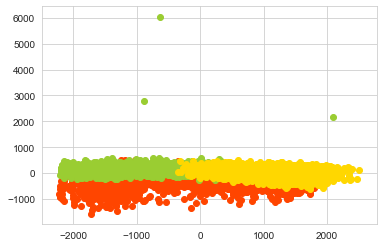

In [81]:
### PCA

from sklearn.decomposition import PCA
acp = PCA(n_components=3).fit_transform(cust_clust)
for couleur,k in zip(['orangered','yellowgreen','gold'],[0,1,2]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()    

(6962, 6)


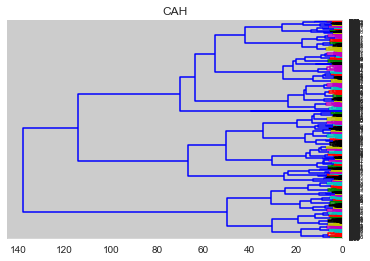

[24 55 53 ... 30 80 31]


In [209]:
#remove the instances corresponding to the group n°0 from the k-means
cust_clust_subset = cust_clust.iloc[kmeans.labels_!=0,:]
print(cust_clust_subset.shape)
    
#standardize the new version of the dataset
cust_clust_subset_cr = preprocessing.scale(cust_clust_subset)

#generate the linkage matrix
Z_subset = linkage(cust_clust_subset_cr,method='ward',metric='euclidean')

#hac and plotting the dendrogram
plt.title("CAH")
dendrogram(Z_subset,labels=cust_clust_subset.index,orientation='left',color_threshold=7)
plt.show()

groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

#### Premium

In [82]:
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(prem_clust)
CA_Norm = pd.DataFrame(CA_Norm, columns = prem_clust.columns)
Z = linkage(CA_Norm,
            method = 'ward')
Z
kmeans = KMeans(n_clusters= 2, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(prem_clust.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(prem_clust))
# Printing the cluster Customer per 
print(pd.crosstab(prem_clust.index[idk],kmeans.labels_))
kmeansP = kmeans

       0
0      0
0   5837
0   5836
0   5835
0   5833
..   ...
1   3097
1   1792
1   6978
1   4613
1   6961

[10058 rows x 1 columns]
[[413.78782776 414.52304304]
 [492.60461787 490.94714611]
 [354.84322046 354.11394131]
 ...
 [447.95258677 448.72951187]
 [369.64829246 368.72907599]
 [447.4191949  448.32939439]]
col_0  0  1
row_0      
0      1  0
1      1  0
2      0  1
3      1  0
4      1  0
...   .. ..
10291  1  0
10292  0  1
10293  1  0
10294  1  0
10295  1  0

[10058 rows x 2 columns]


In [83]:

m = prem_clust.mean()
m
# TSS (total sum of squares)
TSS = prem_clust.shape[0]*prem_clust.var(ddof=0)
print(TSS)
#c onditional groups size
gb = prem_clust.groupby(kmeansP.labels_)
nk = gb.size()
print(nk)
#conditional means
mk = gb.mean()
print(mk)
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2
#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)
BSS = np.sum(EM,axis=0)
print(BSS)
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

Premiums in LOB: Motor                 1.867386e+08
Premiums in LOB: Household             5.245159e+08
Premiums in LOB: Health                5.635728e+07
Premiums in LOB:  Life                 1.766594e+07
Premiums in LOB: Work Compensations    1.784491e+07
dtype: float64
0    5546
1    4512
dtype: int64
   Premiums in LOB: Motor  Premiums in LOB: Household  \
0              401.271322                   85.992580   
1              175.861385                  344.940891   

   Premiums in LOB: Health  Premiums in LOB:  Life  \
0               133.105025               17.007562   
1               211.342125               66.058923   

   Premiums in LOB: Work Compensations  
0                            16.897438  
1                            65.488635  
Premiums in LOB: Motor                 1.264106e+08
Premiums in LOB: Household             1.668259e+08
Premiums in LOB: Health                1.522870e+07
Premiums in LOB:  Life                 5.986038e+06
Premiums in LOB: Work Comp

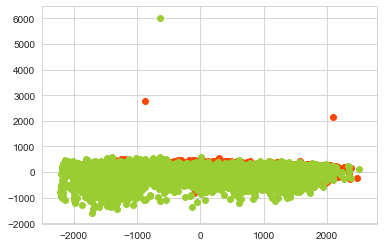

In [84]:
### PCA

from sklearn.decomposition import PCA
acp = PCA(n_components=3).fit_transform(cust_clust)
for couleur,k in zip(['orangered','yellowgreen','gold'],[0,1,2]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()   

#### Nominal

In [ ]:
#KMODES for Nominal
from kmodes.kmodes import KModes
VE_Cat = insurance_df_ct[['Educational Degree','Geographic Living Area','Has Children (Y=1)']].astype('str')

# for j in list(VE_Cat):
#     for i in range(VE_Cat.shape[0]):
#         if VE_Cat.loc[i,j] =='':
#             VE_Cat.loc[i,j] = 'Missing'

km = KModes(n_clusters=3, init='random', n_init=50, verbose=1)

clusters = km.fit_predict(VE_Cat)

kmodesD = km 



In [ ]:
idk = np.argsort(km.labels_)
print(pd.DataFrame(VE_Cat.index[idk],km.labels_[idk]))
# Printing the cluster Customer per 
print(pd.crosstab(VE_Cat.index[idk],km.labels_))

In [ ]:
m = VE_Cat.mean()
m
# TSS (total sum of squares)
TSS = VE_Cat.shape[0]*VE_Cat.var(ddof=0)
print(TSS)
#c onditional groups size
gb = VE_Cat.groupby(km.labels_)
nk = gb.size()
print(nk)
#conditional means
mk = gb.count()
print(mk)
# #square(difference between cond. means and overall mean)
# EMk = (mk-m)**2
# #weighted by the size of the groups
# EM = EMk.multiply(nk,axis=0)
# BSS = np.sum(EM,axis=0)
# print(BSS)
# #square of the correlation ratio
# #i.e. proportion of variance explained
# #for each variable
# R2 = BSS/TSS
# print(R2)

In [ ]:
Cluster1.columns

In [ ]:
nominal

In [ ]:
pd.crosstab(Cluster1['N_Label'],Cluster1['Educational Degree'],margins=True)

In [ ]:
pd.crosstab(Cluster1['N_Label'],Cluster1['Geographic Living Area'],margins=True)

In [ ]:
pd.crosstab(Cluster1['N_Label'],Cluster1['Has Children (Y=1)'],margins=True)

#### All Variables



In [ ]:
Cluster1

#### Building the new DataFrame with the labels

In [ ]:
m = Cluster1.mean()
m
# TSS (total sum of squares)
TSS = Cluster1.shape[0]*Cluster1.var(ddof=0)
# print(TSS)
#c onditional groups size
gb = Cluster1.groupby(kmeans.labels_)
nk = gb.size()
print(nk)
#conditional means
mk = gb.mean()
print(mk)
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2
#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)
BSS = np.sum(EM,axis=0)
print(BSS)
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

 #### Outliers
 

In [254]:
cust_clust_o = insurance_outliers[customer].loc[:,insurance_outliers[customer].columns != "Customer Identity"]
cust_clust_o

,Gross Monthly Salary,Claims Rate,Customer Monetary Value,Age,Fidelity
13,1043.0,1.06,-75.12,16.0,33.0
44,1065.0,1.19,-128.68,26.0,31.0
51,3234.0,25.36,-14714.08,50.0,34.0
112,2354.0,15.65,-8719.04,37.0,19.0
135,2176.0,14.80,-10198.91,28.0,19.0
...,...,...,...,...,...
9936,918.0,0.20,738.24,17.0,27.0
9954,768.0,1.55,-416.73,18.0,42.0
10112,3709.0,0.56,434.43,68.0,23.0
10121,738.0,0.53,365.19,17.0,38.0


In [255]:
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(cust_clust_o)
CA_Norm = pd.DataFrame(CA_Norm, columns = cust_clust_o.columns)
Z = linkage(CA_Norm,
            method = 'ward')
Z
kmeans = KMeans(n_clusters= 3, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)
idk = np.argsort(kmeans.labels_)
# print(pd.DataFrame(prem_clust.index[idk],kmeans.labels_[idk]))
# print(kmeans.transform(prem_clust))
# Printing the cluster Customer per 
# print(pd.crosstab(prem_clust.index[idk],kmeans.labels_))



In [256]:
m = cust_clust_o.mean()
m
# TSS (total sum of squares)
TSS = cust_clust_o.shape[0]*cust_clust_o.var(ddof=0)
print(TSS)
#c onditional groups size
gb = cust_clust_o.groupby(kmeans.labels_)
nk = gb.size()
print(nk)
#conditional means
mk = gb.mean()
print(mk)
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2
#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)
BSS = np.sum(EM,axis=0)
print(BSS)
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

Gross Monthly Salary       4.127684e+09
Claims Rate                8.455391e+04
Customer Monetary Value    3.755818e+10
Age                        5.912884e+04
Fidelity                   9.829170e+03
dtype: float64
0    169
1     36
2      1
dtype: int64
   Gross Monthly Salary  Claims Rate  Customer Monetary Value        Age  \
0           1088.899408     1.237988               -92.999822  20.887574   
1           5702.888889     8.480556             -4549.279167  62.555556   
2           1086.000000   256.200000           -165680.420000  27.000000   

    Fidelity  
0  29.639053  
1  30.555556  
2  26.000000  
Gross Monthly Salary       6.324710e+08
Claims Rate                6.560303e+04
Customer Monetary Value    2.761815e+10
Age                        5.152909e+04
Fidelity                   3.929877e+01
dtype: float64
Gross Monthly Salary       0.153227
Claims Rate                0.775872
Customer Monetary Value    0.735343
Age                        0.871471
Fidelity             

In [ ]:
prem_clust_o = insurance_outliers[premiums].loc[:,insurance_outliers[premiums].columns != "Customer Identity"]
prem_clust_o 


In [ ]:
scaler = StandardScaler()
CA_Norm = scaler.fit_transform(prem_clust_o)
CA_Norm = pd.DataFrame(CA_Norm, columns = prem_clust_o.columns)
Z = linkage(CA_Norm,
            method = 'ward')
Z
kmeans = KMeans(n_clusters= 2, 
                random_state=0,
                n_init = 5,
                max_iter = 200).fit(CA_Norm)
idk = np.argsort(kmeans.labels_)
# print(pd.DataFrame(prem_clust.index[idk],kmeans.labels_[idk]))
# print(kmeans.transform(prem_clust))
# Printing the cluster Customer per 
# print(pd.crosstab(prem_clust.index[idk],kmeans.labels_))



In [ ]:
m = prem_clust_o.mean()
m
# TSS (total sum of squares)
TSS = prem_clust_o.shape[0]*prem_clust_o.var(ddof=0)
print(TSS)
#c onditional groups size
gb = prem_clust_o.groupby(kmeans.labels_)
nk = gb.size()
print(nk)
#conditional means
mk = gb.mean()
print(mk)
#square(difference between cond. means and overall mean)
EMk = (mk-m)**2
#weighted by the size of the groups
EM = EMk.multiply(nk,axis=0)
BSS = np.sum(EM,axis=0)
print(BSS)
#square of the correlation ratio
#i.e. proportion of variance explained
#for each variable
R2 = BSS/TSS
print(R2)

Decision Tree

In [327]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
prima = dff

In [303]:
prima.columns

Index(['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations', 'P_Label',
       'Gross Monthly Salary', 'Claims Rate', 'Customer Monetary Value',
       'Client Spend', 'Fidelity', 'Age', 'C_Label', 'Educational Degree',
       'Geographic Living Area', 'Has Children (Y=1)', 'N_Label', 'F_label'],
      dtype='object')

In [328]:
prima = prima.dropna()

In [331]:

X = prima[['Premiums in LOB: Motor', 'Premiums in LOB: Household',
       'Premiums in LOB: Health', 'Premiums in LOB:  Life',
       'Premiums in LOB: Work Compensations','Gross Monthly Salary', 'Claims Rate', 'Customer Monetary Value',
       'Client Spend', 'Fidelity','Age']]
y = prima['F_label']
y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.19831346321605117


In [347]:
# from sklearn.datasets import load_iris
# from sklearn import tree
# X, y = load_iris(return_X_y=True)
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y)


[Text(167.4, 199.32, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue 

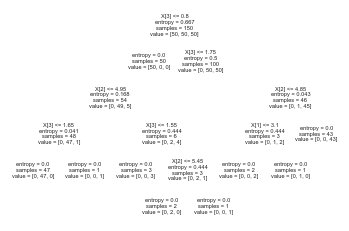

In [338]:
tree.plot_tree(clf.fit(X,y)) 

<hr>
<b style='color: ##154360;font-size:19px' id="references">References</b><br>

<ul>
    <li>Smart Vision Europe. <i>What is the CRISP-DM methodology? </i> Available from: <a href="https://www.sv-europe.com/crisp-dm-methodology/" target="_blank">https://www.sv-europe.com/crisp-dm-methodology/</a></li>
    <li>website. <i>title</i>. Available from: <a href="url" target="_blank">url</a></li>
</ul>
